# CNN Testing Code

- Build model on mobile (or smaller variation of a image classifier) so can predict easily on hosted platform
- Need dockerize model [Accepts an image as input & returns a Prediction = (earth or mars) as output]

In [1]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

# Put in Eval Mode
model.eval()

Using cache found in /home/ckg/.cache/torch/hub/pytorch_vision_v0.10.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Sample Execution of Prediction on Image

In [3]:
# Fetch Example Image
import urllib

url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")

try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [4]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms

# Open Image
input_image = Image.open(filename)
input_image = Image.open('../MarsImages/images/0647MH0003250050203806E01_DRCL.JPG') #random mars image

# PreProcessing Pipeline
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224), #maybe do random crops of Mars images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), #heuristic transforms (widely used & gtg)
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model


# Move to GPU if Available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad(): #not updating weights in misc pred test
    output = model(input_batch)


# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])

# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-2.1890e+00, -1.7432e+00,  7.5294e-02, -9.1410e-01, -4.1793e-01,
         1.3296e+00,  2.2344e-01,  6.2259e-02,  3.4057e-01,  2.6138e+00,
         3.5695e+00,  1.5325e+00,  2.1997e+00,  3.4203e+00,  2.5464e+00,
         1.8774e+00,  2.9315e+00,  1.6949e+00,  1.8588e+00,  3.5267e+00,
         1.3767e+00,  2.1029e+00,  1.0226e+00,  1.8924e+00,  1.0027e+00,
        -4.4949e-01,  1.8827e+00,  8.5848e-03, -2.5882e-01,  5.6512e-01,
        -3.3582e-02,  2.1088e+00,  1.4923e+00,  1.3787e+00,  2.7741e+00,
         1.8866e+00,  1.9659e+00,  3.6990e-01,  3.5126e+00,  2.6865e+00,
         3.1413e+00,  4.9667e+00,  4.3076e+00,  3.6510e+00,  3.3482e+00,
         3.3752e+00,  2.3356e+00,  4.0349e+00,  3.8844e+00,  3.8600e+00,
         1.0020e+00,  1.7034e+00,  3.2573e+00,  1.6013e+00,  2.2852e+00,
         1.6943e+00,  1.6960e+00,  8.7193e-01,  1.7084e+00,  3.6145e+00,
         3.4938e+00,  2.8218e+00,  4.3200e+00,  4.0337e+00,  5.2510e+00,
         2.1331e+00,  3.9623e+00,  2.0823e+00,  3.7

cliff dwelling 0.05463782325387001
green mamba 0.03556926175951958
bee eater 0.03535063564777374
meerkat 0.030376238748431206
mongoose 0.02893977425992489


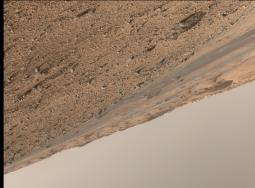

In [5]:
# Check probabilities against Labels


# Get Labels (categories = cats)
with open("../imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

t5_probs, t5_catid = torch.topk(probabilities, k=5)

for i in range(t5_probs.size(0)):
    print(categories[t5_catid[i]], t5_probs[i].item())


input_image #PIL lib provided (Open_Image)



In [5]:
model.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [14]:
pytorch_total_params = sum(p.numel() for p in model.parameters())

pytorch_total_params

11689512

In [7]:
# Sample Send Device to GPU
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


# Can use above like following 
t1 = torch.randn(1, 2)
t2 = torch.randn(1, 2).to(device=dev)

print(t1, "\n", t2) #verify locations of tensors



tensor([[-0.3996, -0.1534]]) 
 tensor([[ 0.1823, -0.8946]], device='cuda:0')
